In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

In [3]:
X = Data['x']
Y = Data['y']

Text(0, 0.5, 'y')

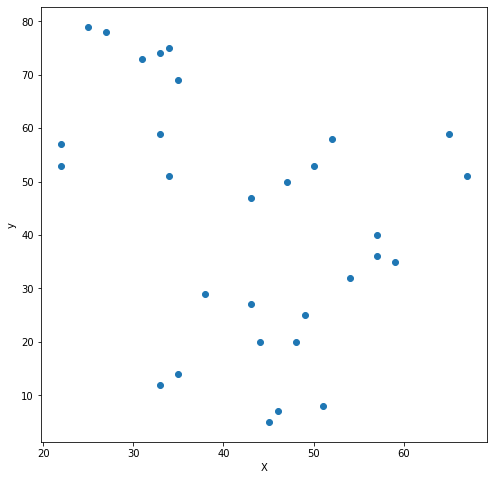

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("y")

In [5]:
# chose 3 random points to be centroids
import random
def random_centroids(number_of_centroids, training_set_size):
    x_point = []
    y_point = []

    for i in range(number_of_centroids):
        j = random.randint(1, training_set_size-1)

        x_point.append(X[j])
        y_point.append(Y[j])

    
    centroids = {"x": x_point, "y":y_point}
    return centroids

In [6]:
# 3 random centroids are not stored in a Dictionary object
number_of_centroids = 3
centroids = random_centroids(number_of_centroids, len(X))

print(centroids)

{'x': [48, 33, 57], 'y': [20, 74, 40]}


Text(0, 0.5, 'y')

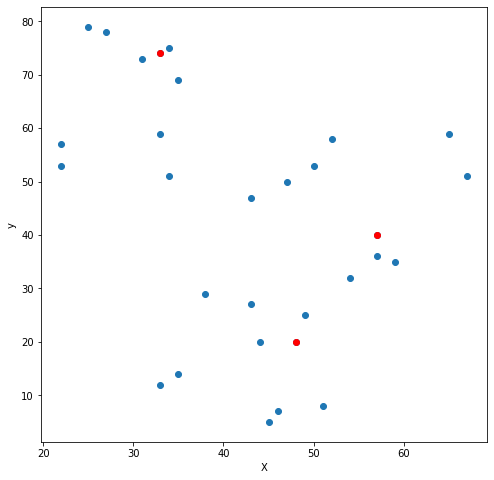

In [7]:
# Lets plot the centroids along with other points
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.scatter(centroids["x"], centroids["y"], color='red')
plt.xlabel("X")
plt.ylabel("y")

In [8]:
# Next step would be to find the distance of each point from each centroid
import math
def eucledian_distance(x1, y1, x2, y2):
     return math.sqrt(((x1-x2)**2) + ((y1-y2)**2))

In [9]:
# This function will calculate the distance of each point from each centroid
def calculate_distance_from_centroids(centroid, point_x, point_y):
    
    distances = []
    centroid_distances = {}
    for i in range(len(centroid["x"])):
        for j in range(len(X)):

            distances.append(eucledian_distance(centroid["x"][i], centroid["y"][i], point_x[j], point_y[j]))
                        
        centroid_distances[i] = distances
        distances = []
    return centroid_distances

In [10]:
# This function takes the mean distance of each cluster's points
def mean_distance_cluster(df, x, y):
    return df.groupby("cluster").mean()[["x", "y"]]

In [11]:
# This is the main kmeans function
def kmeans(centroids, x, y):
    diff = 1
    i = 0
    while (diff!=0):
        centroid_distances = calculate_distance_from_centroids(centroids, x, y)
        df = pd.DataFrame()
        df.iloc[0:0]
        df = pd.DataFrame(calculate_distance_from_centroids(centroids, X, y))
        
        df['cluster'] = df.idxmin(axis=1)
        df["x"] = x
        df["y"] = y
        
        new_centroids = mean_distance_cluster(df, x, y)
        
        diff = (new_centroids["x"] - centroids["x"]).sum() + (new_centroids["y"] - centroids["y"]).sum()
        print(diff)
        centroids = new_centroids
     
        i+=1
        
    return df

-14.499999999999996
0.0


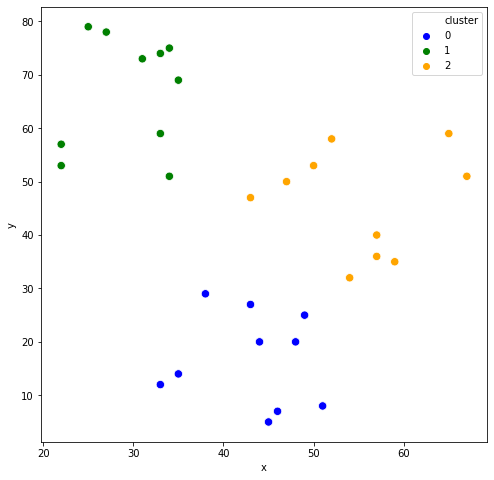

In [12]:
# This is for plotting the final clustering
df_new = kmeans(centroids, X, Y)
plt.figure(figsize=(8, 8))
sns.scatterplot(df_new['x'], df_new['y'], hue=df_new['cluster'], palette=["blue", "green", "orange"], s=70)

[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


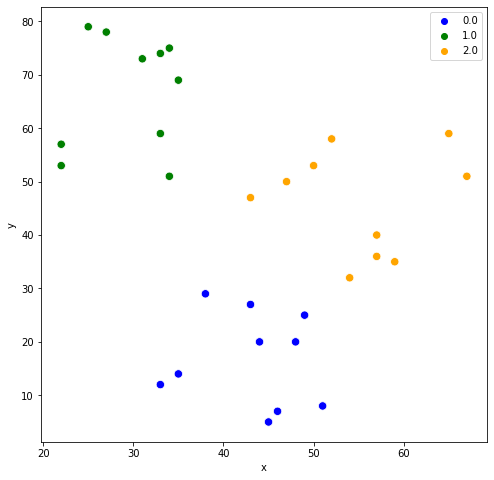

In [13]:
# Finding the kmeans using sklearn

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df_sklearn = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3).fit(df_sklearn)
centroids = kmeans.cluster_centers_
print(centroids)

plt.figure(figsize=(8, 8))
#plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=70)
sns.scatterplot(df_sklearn['x'], df_sklearn['y'], hue = kmeans.labels_.astype(float), palette=["blue", "green", "orange"], s=70)

The comparison of scatter plot for both with and without sklearn shows the same results. This shows that our implementation of K-Means works great.